

Low pass filter is the type of frequency domain filter that is used for smoothing the image. It attenuates the high frequency components and preserves the low frequency components. While high pass filter is the type of frequency domain filter that is used for sharpening the image.




### 1. Write your code below

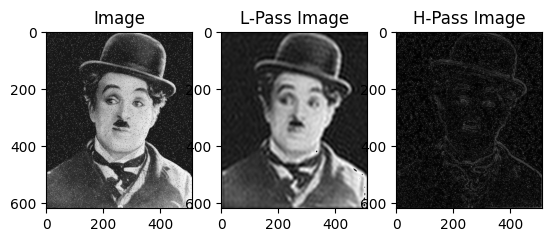

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('choplin.png', cv2.IMREAD_GRAYSCALE)


f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)


rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1


fshift_lp = fshift * mask


f_ishift_lp = np.fft.ifftshift(fshift_lp)
image_lp = np.fft.ifft2(f_ishift_lp)
image_lp = np.abs(image_lp)


mask_hp = np.ones((rows, cols), np.uint8)
mask_hp[crow-30:crow+30, ccol-30:ccol+30] = 0


fshift_hp = fshift * mask_hp


f_ishift_hp = np.fft.ifftshift(fshift_hp)
image_hp = np.fft.ifft2(f_ishift_hp)
image_hp = np.abs(image_hp)


image_lp = np.uint8(image_lp)
image_hp = np.uint8(image_hp)


plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Image')
plt.subplot(132), plt.imshow(image_lp, cmap='gray'), plt.title('L-Pass Image')
plt.subplot(133), plt.imshow(image_hp, cmap='gray'), plt.title('H-Pass Image')
plt.show()


### Write your explanation below

If the objective is to reduce noise and create a smoother image with less emphasis on fine details, then go with the low pass filter

if the goal is to enhance edges and fine details, the highpass filter would be more suitable.